# A/B Testing with Machine Learning

### Split the Data by browser and platform_os
> and version each split as a new version of the data in dvc.

Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys

In [20]:
#pip install xgboost

In [21]:
# To Train our data
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB

In [22]:
#path of file
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
sys.path.insert(0, path_parent+'/notebooks')

Get the Data

Import the Data

In [27]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('max_column', None)
df = pd.read_csv('data/AdSmartABdata.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'data/AdSmartABdata.csv'

In [28]:
df.head(10)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,1,7,8,46,6,2,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,1,4,10,46,6,2,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,1,2,2,29,6,3,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,0,0,15,137,6,6,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,0,0,15,46,6,2,0,0
5,0027ce48-d3c6-4935-bb12-dfb5d5627857,0,0,15,177,6,6,0,0
6,002e308b-1a07-49d6-8560-0fbcdcd71e4b,0,0,15,46,6,2,0,0
7,00393fb9-ca32-40c0-bfcb-1bd83f319820,0,6,5,184,6,6,0,0
8,004940f5-c642-417a-8fd2-c8e5d989f358,1,1,0,46,6,3,0,0
9,004c4cc9-f2ca-4df7-adc9-3d0c3c4f0342,0,2,14,46,6,2,0,0


In [29]:
df['target_class'] = df['yes'].map(lambda x: x==1)
df = df.drop(columns = ['yes', 'no'], axis=1)
df.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,target_class
0,0008ef63-77a7-448b-bd1e-075f42c55e39,1,7,8,46,6,2,False
1,000eabc5-17ce-4137-8efe-44734d914446,1,4,10,46,6,2,False
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,1,2,2,29,6,3,False
3,00187412-2932-4542-a8ef-3633901c98d9,0,0,15,137,6,6,False
4,001a7785-d3fe-4e11-a344-c8735acacc2c,0,0,15,46,6,2,False


In [30]:
# Encode aware to 0 and 1
df['target_class'] = df['target_class'].astype(int)

### Label Encoding the Data

In [31]:
def encode_labels(df):
    date_encoder = preprocessing.LabelEncoder()
    device_encoder = preprocessing.LabelEncoder()
    browser_encoder = preprocessing.LabelEncoder()
    experiment_encoder = preprocessing.LabelEncoder()
    target_class = preprocessing.LabelEncoder()
    
    df['date'] = date_encoder.fit_transform(df['date'])
    df['device_make'] = device_encoder.fit_transform(df['device_make'])
    df['browser'] = browser_encoder.fit_transform(df['browser'])
    df['experiment'] = experiment_encoder.fit_transform(df['experiment'])
    df['browser'] = target_class.fit_transform(df['browser'])
    df['target_class'] = target_class.fit_transform(df['target_class'])
    
    return df  

#### Split data by browser and platform_os, and version each split as a new version of the data in dvc.

In [32]:
def split_data(df):
    
    browser_df = df[["experiment", "hour", "date", 'device_make', 'browser', 'target_class']] 
    platform_df = df[["experiment", "hour", "date", 'device_make', 'platform_os', 'target_class']] 

    return browser_df, platform_df

Save the split dataset

In [33]:
broweser_df, platfrom_df = split_data(df)
broweser_df.to_csv("data/browser_data.csv")
platfrom_df.to_csv("data/platform_data.csv") 

FileNotFoundError: [Errno 2] No such file or directory: 'data/browser_data.csv'

### Exploring the dataset 

In [34]:
from sklearn.model_selection import train_test_split
feature_cols = ["experiment", "hour", "date", 'device_make', 'browser']

X = df[feature_cols]
y = df[['target_class']]

test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Training the models

* Random Forest (It's my favorite)
* Desicion Tree
* Logistic Regression Classifier
* Bernouilli Naive Bias
* Gaussian Naive Bias
* KNN (K-Nearest Neighbors)
* XGBoost (It's new and have acurate predictions)

In [47]:
# Define Random Forest Model
rf = RandomForestClassifier(n_estimators=100)

# We fit our model with our train data
rf.fit(X_train, y_train)

# Then predict results from X_test data
pred_rf = rf.predict(X_test)

# See First 10 Predictions and They Actual Values
print("Predicted:", pred_rf[0:10])
print("Actual:", y_test[0:10])

/tmp/ipykernel_59288/3992851503.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Predicted: [1 0 0 0 0 0 0 0 0 0]
Actual:       target_class
1595             1
7063             0
2111             0
6237             0
1862             0
3519             0
487              0
6578             0
6414             0
3207             0


Feature importance

/tmp/ipykernel_59288/277187028.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


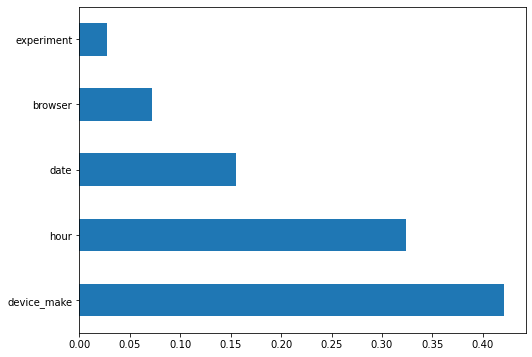

In [36]:
# Feature Importance:using Random forest Classifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model=RandomForestClassifier()
model.fit(X_train,y_train)
plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [48]:
xgb_params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}


In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
from xgboost import XGBClassifier
clf_xgb =XGBClassifier(objective='binary:logistic',seed=42)
random_search=RandomizedSearchCV(clf_xgb,param_distributions=xgb_params,scoring="accuracy",cv=10,verbose=10)
random_search.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3
[CV 1/10; 1/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3;, score=0.930 total time=   0.6s
[CV 2/10; 1/10] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3
[CV 2/10; 1/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3;, score=0.930 total time=   0.4s
[CV 3/10; 1/10] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3
[CV 3/10; 1/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3;, score=0.930 total time=   0.3s
[CV 4/10; 1/10] START colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3
[CV 4/10; 1/10] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, m

RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [51]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [52]:
xg=XGBClassifier(colsample_bylevel=1, colsample_bytree=0.4,
              gamma=0.3, gpu_id=-1, learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
              n_estimators=100)

In [53]:
xg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.25, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=7,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
from xgboost import XGBClassifier
final_xgb=XGBClassifier(objective='binary:logistic',seed=42,colsample_bytree=0.3, gamma=0.1,learning_rate=0.05,max_depth=15,min_child_weight=3)

In [60]:
final_xgb.fit(X_train,y_train,
        eval_set=[(X_train,y_train),(X_valid,y_valid)],
        eval_metric=['logloss','auc'],
        early_stopping_rounds=30,
        verbose=True)

[0]	validation_0-logloss:0.65725	validation_0-auc:0.52439	validation_1-logloss:0.65734	validation_1-auc:0.52149
[1]	validation_0-logloss:0.62478	validation_0-auc:0.52439	validation_1-logloss:0.62495	validation_1-auc:0.52149
[2]	validation_0-logloss:0.59533	validation_0-auc:0.52439	validation_1-logloss:0.59555	validation_1-auc:0.52149
[3]	validation_0-logloss:0.56850	validation_0-auc:0.52731	validation_1-logloss:0.56882	validation_1-auc:0.51929
[4]	validation_0-logloss:0.54403	validation_0-auc:0.52731	validation_1-logloss:0.54439	validation_1-auc:0.51929
[5]	validation_0-logloss:0.52165	validation_0-auc:0.52731	validation_1-logloss:0.52206	validation_1-auc:0.51929
[6]	validation_0-logloss:0.50113	validation_0-auc:0.52731	validation_1-logloss:0.50162	validation_1-auc:0.51929
[7]	validation_0-logloss:0.48226	validation_0-auc:0.55536	validation_1-logloss:0.48287	validation_1-auc:0.53734
[8]	validation_0-logloss:0.46491	validation_0-auc:0.55536	validation_1-logloss:0.46564	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.3,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)